# Algoritmo para estimativa de fase quântica

Um operador é unitário se 
$$U^{-1}=U^\dagger,$$
i.e., 
$$UU^\dagger = U^\dagger U=I.$$
Vamos considerar a equação de autovalores e autovetores de um operador uniário:
$$U|u\rangle = u|u\rangle.$$
Tomando o produto interno desta equação com ela mesma, teremos que
\begin{align}
& \langle u|U^\dagger U|u\rangle = \langle u|u^* u|u\rangle \\
& \therefore\ \langle u|I|u\rangle = |u|^2\langle u|u\rangle \\
& \therefore\ 1 = |u|^2 \therefore\ 1 = |u|.
\end{align}
Ou seja, os autovalores de um operador unitário tem módulo igual a um. Escrevendo os números complexos na forma polar, teremos então que
$$u = |u|e^{i\phi} = e^{i\phi} =: e^{2\pi i\phi_u}.$$
Ou seja
$$\phi = 2\pi\phi_u\ \therefore\ \phi_u = \frac{\phi}{2\pi}\in[0,1]\ \text{se}\ \phi\in[0,2\pi].$$

No algoritmo de estimativa de fase quântico (QPEA), que é uma das subrotinas mais importantes da computação quântica, assume-se a existência de uma __caixa preta__ capaz de preparar o autovetor 
$$|u\rangle$$
e de implementar a porta controlada 
$$C_{U^{2^j}}$$
para $j$ inteiro positivo. Claro, assume-se que isso seja feito de forma eficiente. 

O __problema__ que queremos resolver aqui é calcular a autofase desconhecida $\phi_u$. O QPEA usa __2 registros__. Um deles contém o número de qubits suficiente para codificar o estado $|u\rangle$. O outro registro contém $t$ qubits, todos preparados inicialmente no estado $|0\rangle$. Este número $t$ estará relacionado com a precisão que teremos na estimativa de $\phi_u$.

Com isso, o estado inicial será
$$|\Psi_0\rangle = |0\rangle^{\otimes t}\otimes|u\rangle.$$

Na sequência, aplicamos uma porta Hadamard em cada um dos qubits do 1º registro, obtendo assim
\begin{align}
|\Psi_1\rangle & = (H^{\otimes t}\otimes I)(|0\rangle^{\otimes t}\otimes|u\rangle) \\
& = |+\rangle^{\otimes t}\otimes|u\rangle \\
& = 2^{-t/2}\big(|0\rangle_1+|1\rangle_1\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big)\otimes|u\rangle
\end{align}

<img src='fig_phase_estimation.png' width='300'>
<img src='fig_phase_estimation_.png' width='500'>

Seguindo, aplica-se portas $U^{2^j}$ controladas, com o 2º registro (2ºr) como target e com o qubit 
$$s=1,2,\cdots,t$$
como controle, de forma que 
$$j=t-s.$$
Por exemplo, para o qubit $s=1$ como controle, teremos
\begin{align}
|\Psi_2\rangle & = C_{U^{2^{t-1}}}^{1\rightarrow (2ºr)}|\Psi_1\rangle \\
& = 2^{-t/2}\big(|0\rangle_1\otimes I|u\rangle+|1\rangle_1\otimes U^{2^{t-1}}|u\rangle\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big) \\
& = 2^{-t/2}\big(|0\rangle_1\otimes |u\rangle+|1\rangle_1\otimes e^{2\pi i\phi_u 2^{t-1}}|u\rangle\big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big) \\
& = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+|1\rangle_{t}\big)\otimes |u\rangle.
\end{align}
Note que acima usamos que, para 
$$U=\sum_u u|u\rangle\langle u|,$$ 
temos 
$$U^{2^j}=\sum_u u^{2^j}|u\rangle\langle u|.$$
Então, para 
$$u=e^{2\pi i\phi_u}$$ 
sendo autovalor de $U$, o autovalor correspondente de $U^{2^j}$ será 
$$u^{2^j}=e^{2\pi i\phi_u 2^j}.$$

Do mesmo modo, continuando com a aplicação das portas $U^{2^{t-s}}$ controladas para o qubit $s=2,\cdots,t$ como controle, obteremos o estado
\begin{align}
|\Psi_3\rangle & = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+e^{2\pi i2^{t-2}\phi_u}|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+e^{2\pi i2^{t-t}\phi_u}|1\rangle_{t}\big)\otimes |u\rangle \\
& = |\psi_3\rangle\otimes|u\rangle.
\end{align}

Vimos que a transformada de Fourier tem a seguinte ação em estados da base computacional:
\begin{align}
F|j\rangle & = \frac{1}{2^t}\sum_{k=0}^{2^{t}-1}e^{2\pi ijk2^{-t}}|k\rangle \\
F|j_{1}\cdots j_{t}\rangle & = 2^{-t/2}\big(|0\rangle+e^{2\pi ij2^{-1}}|1\rangle\big)\otimes\big(|0\rangle+e^{2\pi ij2^{-2}}|1\rangle\big)\otimes\cdots \otimes\big(|0\rangle+e^{2\pi ij2^{-t}}|1\rangle\big).
\end{align}

__Se $2^t \phi_u$ fosse um número inteiro__, poderíamos identificar
$$j=2^t \phi_u.$$
Com isso, teríamos que
\begin{align}
F|2^t \phi_u\rangle & = \frac{1}{2^t}\sum_{k=0}^{2^{t}-1}e^{2\pi ik\phi_u}|k\rangle \\
& = 2^{-t/2}\big(|0\rangle_1+e^{2\pi i2^{t-1}\phi_u}|1\rangle_1 \big)\otimes\big(|0\rangle_2+e^{2\pi i2^{t-2}\phi_u}|1\rangle_2\big)\otimes\cdots\otimes\big(|0\rangle_{t}+e^{2\pi i2^{0}\phi_u}|1\rangle_{t}\big) \\
& = |\psi_3\rangle.
\end{align}

Com essa suposição, de que $2^t \phi_u \in \mathbb{Z}$, obteríamos o __estado final__ 
\begin{align}
|\psi_4\rangle & = F^\dagger|\psi_3\rangle \\
& = F^\dagger F|2^t \phi_u\rangle \\
& = |2^t \phi_u\rangle.
\end{align}

Então, a penúltima fase do QPEA é aplicar a transformada de Fourier inversa, $F^\dagger$, aos $t$ qubits do 1º registro. Feito isso, obteremos o estado $|2^t \phi_u\rangle$ medindo na base computacional, que é a última etapa do QPEA.

Por fim, mesmo no caso em que $2^t\phi_u$ não é um número inteiro,
$$2^t \phi_u \notin\mathbb{Z},$$
executamos o mesmo circuito quântico. No final, fazemos uma medida na base computacional no 1º registro, obtendo e.g. o estado
$$|b\rangle = |b_1 b_2 \cdots b_t\rangle,$$
com 
$$b_s = 0,1 \text{ para } s=0,\cdots,t.$$
Com isso, a __fase é estimada__ usando-se
$$|2^{t}\phi_u\rangle \approx |b\rangle\ \therefore\ \phi_u \approx 2^{-t}b.$$

## Implementação geral

Para a implementação geral que faremos a seguir, notemos que
\begin{align}
(C_U)^2 & = C_U C_U \\
& = \big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U\big)\big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U\big) \\
& = \big(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U^2\big) \\
& = C_{U^2}.
\end{align}
Com isso, teremos que
$$C_{U^N} = \Pi_{k=1}^{N} C_{U} = (C_U)^N.$$

In [161]:
from qiskit import *
import numpy as np
import math
from matplotlib import pyplot as plt
import qiskit
nshots = 8192
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2023-05-12 10:18:29,891: Credentials are already in use. The existing account in the session will be replaced.


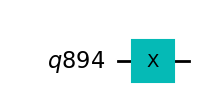

In [253]:
def qc_eigvec_prep(n):
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr, name=r'$|u\rangle$')
    qc.x(0) # prepara |1>
    return qc
qc_eigvec_prep_ = qc_eigvec_prep(n=1)
qc_eigvec_prep_.draw('mpl')

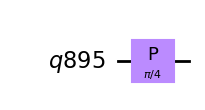

In [254]:
def qc_U(n):
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr, name=r'$U$')
    qc.p(math.pi/4,0) # porta T, para phi_u = 1/8
    return qc
qc_U_ = qc_U(n=1)
qc_U_.draw('mpl')

In [255]:
def qc_ctrlu(n,N):
    qr = QuantumRegister(1+n)
    qc = QuantumCircuit(qr)
    qc_U_ = qc_U(n)
    for k in range(0,N):
        qc.append(qc_U_.to_gate().control(1), [j for j in range(0,n+1)])
    return qc

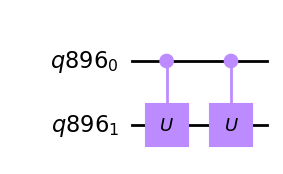

In [256]:
n = 1; N = 2
qc_ctrlu_  = qc_ctrlu(n,N)
qc_ctrlu_.draw('mpl')

In [206]:
def qc_iqft(n):
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr, name = 'IQFT')
    if n%2 == 0:
        ul = n//2
    else:
        ul = (n-1)//2
    for p in range(ul-1, -1, -1):
        qc.swap(p, n-1-p)
    for l in range(n-1, -1, -1):
        if l < n-1:
            for q in range(n-1, l+1-1, -1):
                lb = -2*math.pi*2**(-q+l-1)
                qc.cp(lb, qr[q], qr[l])
        qc.h(qr[l])
    return qc

In [212]:
def qc_qpe(t,n):
    # t = numero de qubits do 1º registro
    # n = numero de qubits do 2º registro, onde U atua
    qr = QuantumRegister(t+n)
    qc = QuantumCircuit(qr, name='QPE')
    for j in range(0,t):
        qc.h(j)
    qc_eigvec_prep_ = qc_eigvec_prep(n) # prepara o autovetor de U
    qc.append(qc_eigvec_prep_, [j for j in range(t,t+n)])
    for j in range(t-1,-1,-1):
        N = 2**(t-1-j) # potencial da U controlada
        qc_ctrlu_ = qc_ctrlu(n,N)
        lista = []
        lista.append(j)
        for l in range(t,t+n):
            lista.append(l)
        qc.append(qc_ctrlu_, lista)
    qc_iqft_ = qc_iqft(t)
    qc.append(qc_iqft_, [j for j in range(0,t)])
    return qc

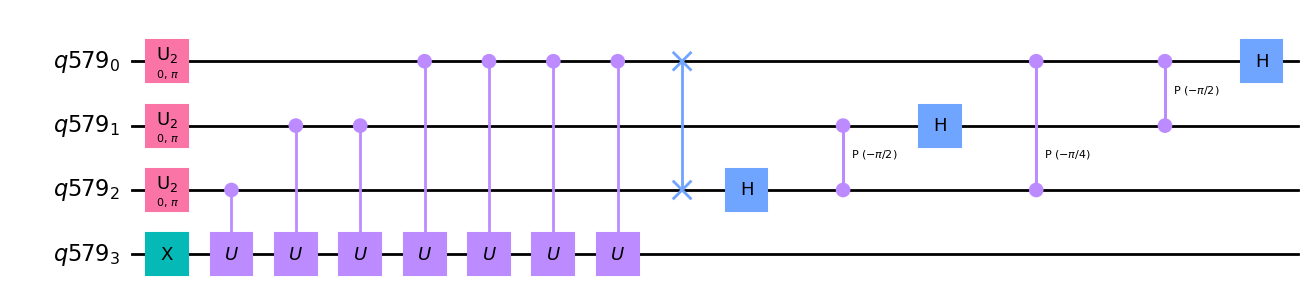

In [151]:
qc_qpe_ = qc_qpe(3,1)
qc_qpe_.decompose().draw('mpl')

## Exemplo: Porta $T$

Essa porta é
$$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4}\end{bmatrix}.$$
Teremos assim que
$$T|1\rangle = e^{i\pi/4}|1\rangle = e^{2\pi i/8}|1\rangle = e^{2\pi i\phi_1}|1\rangle.$$
Ou seja
$$\phi_1 = \frac{1}{8} = 2^{-3} \equiv 2^{-3}(001)_{10} = 2^{-3}2^0.$$
Aqui vamos usar
$$t=3$$
qubits.

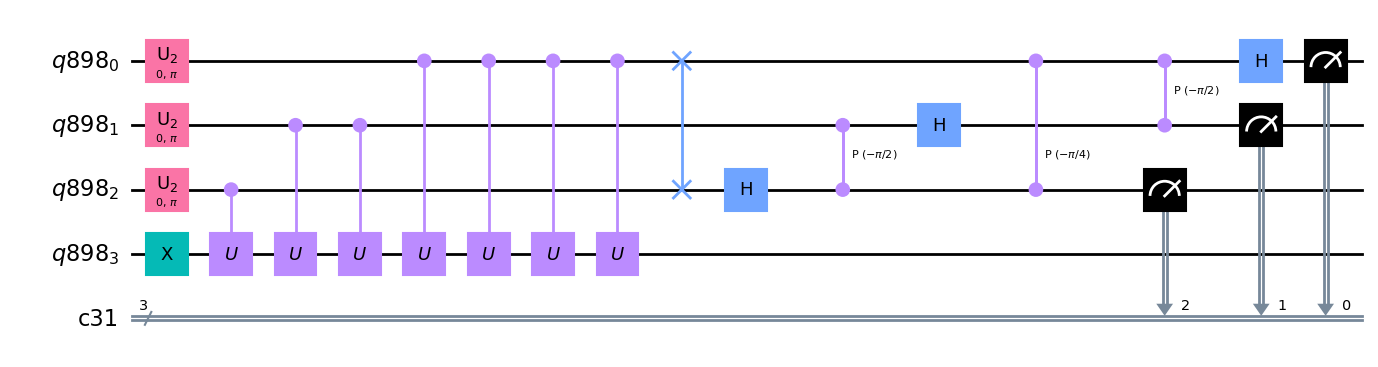

In [257]:
t = 3; n = 1
qr = QuantumRegister(t+n)
cr = ClassicalRegister(t)
qc = QuantumCircuit(qr, cr)
qc_qpe_ = qc_qpe(t,n)
qc.append(qc_qpe_, [j for j in range(0,t+n)])
qc.measure([j for j in range(0,t)],[j for j in range(0,t)])
qc.decompose().decompose().draw('mpl')

#### Simulação

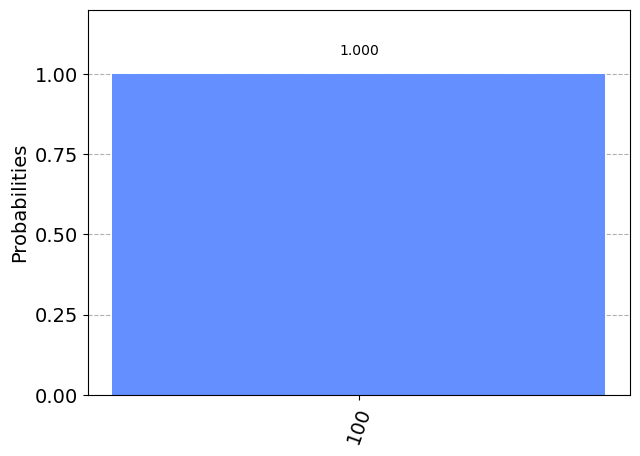

In [258]:
job_sim = execute(qc, backend = simulator, shots = nshots)
plot_histogram(job_sim.result().get_counts())

Note que neste caso o autovalor é estimado exatamente
\begin{align}
\phi_u & \approx 2^{-3}b \\
& = 2^{-3}(001) = 2^{-3}(1) = \frac{1}{8}.
\end{align}

#### Experimento

In [157]:
job_exp = execute(qc, backend = device, shots = nshots)
job_monitor(job_exp)
print(job_exp.job_id())

Job Status: job has successfully run
chema7cqqnv6prm028d0


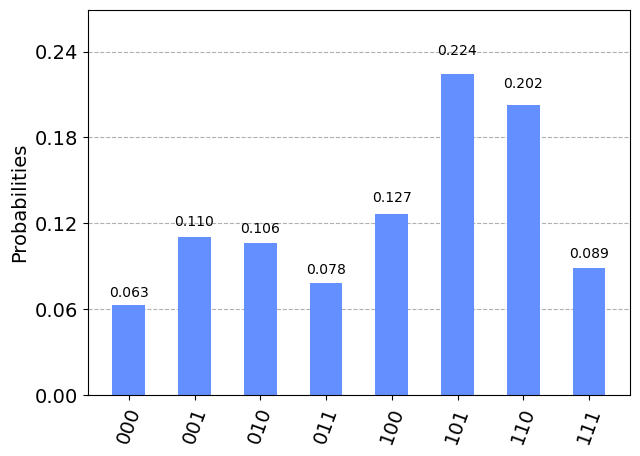

In [159]:
plot_histogram(job_exp.result().get_counts())

Com o experimento, a estimativa para a autofunção é
$$\phi_u \approx 2^{-3}(101) = \frac{5}{8} = 0.625,$$
que não é o resultado esperado.

In [160]:
5/8

0.625

## Exemplo: $\phi_u = \frac{1}{3} \approx 0.3333333$

A porta $T$ que usamos no exemplo anterior é um caso particular da porta de fase
$$P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi}\end{bmatrix}.$$
Vamos usar essa mesma transformação unitária aqui. Para termos
$$\phi_u = \frac{1}{3},$$
o autovalor da unitária deve ser
$$u = e^{2\pi i\phi_u} = e^{i 2\pi/3}.$$
Portanto, neste caso a matriz unitária é
$$U = P(2\pi/3),$$
e teremos que
$$P(2\pi/3)|1\rangle = e^{i 2\pi/3}|1\rangle.$$

OBS. Para este exemplo, faremos somente simulações.

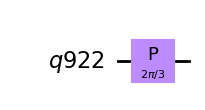

In [259]:
def qc_U(n):
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr, name=r'$U$')
    qc.p(2*math.pi/3,0) # para phi_u = 1/3
    return qc
qc_U_ = qc_U(n=1)
qc_U_.draw('mpl')

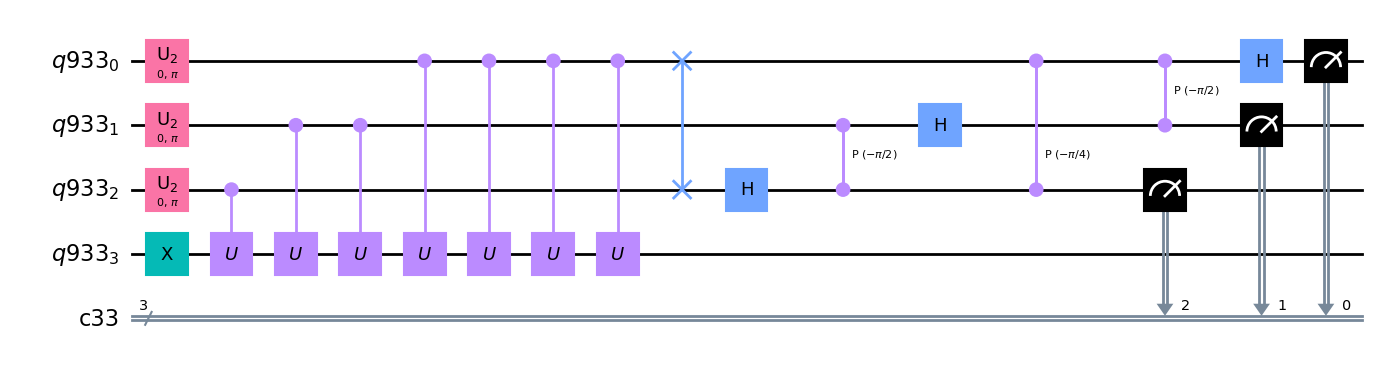

In [261]:
t = 3; n = 1
qr = QuantumRegister(t+n)
cr = ClassicalRegister(t)
qc = QuantumCircuit(qr, cr)
qc_qpe_ = qc_qpe(t,n)
qc.append(qc_qpe_, [j for j in range(0,t+n)])
qc.measure([j for j in range(0,t)],[j for j in range(0,t)])
qc.decompose().decompose().draw('mpl')

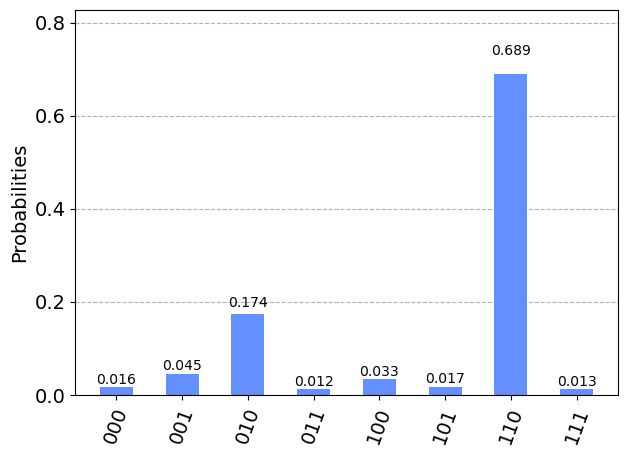

In [262]:
job_sim = execute(qc, backend = simulator, shots = nshots)
plot_histogram(job_sim.result().get_counts())

Nesse caso, mesmo na situação ideal da simulação, não teremos um único resultado. Fica a questão sobre __como escolher__ o resultado a ser usado para estimar a autofase. Uma opção seria escolher o __estado de maior probabilidade__. Nesse caso, teríamos
\begin{align}
\phi_u & \approx 2^{-3}(011) = \frac{3}{8} \\
& \approx 0.375,
\end{align}
que está um tanto longe do resultado esperado, $0.3333$.

In [1]:
1/3, 3/8

(0.3333333333333333, 0.375)

### Mais precisão

Para obter mais precisão, temos que adicionar mais qubits no 1º registro. A seguir mostramos os resultados para 
$$t=5.$$

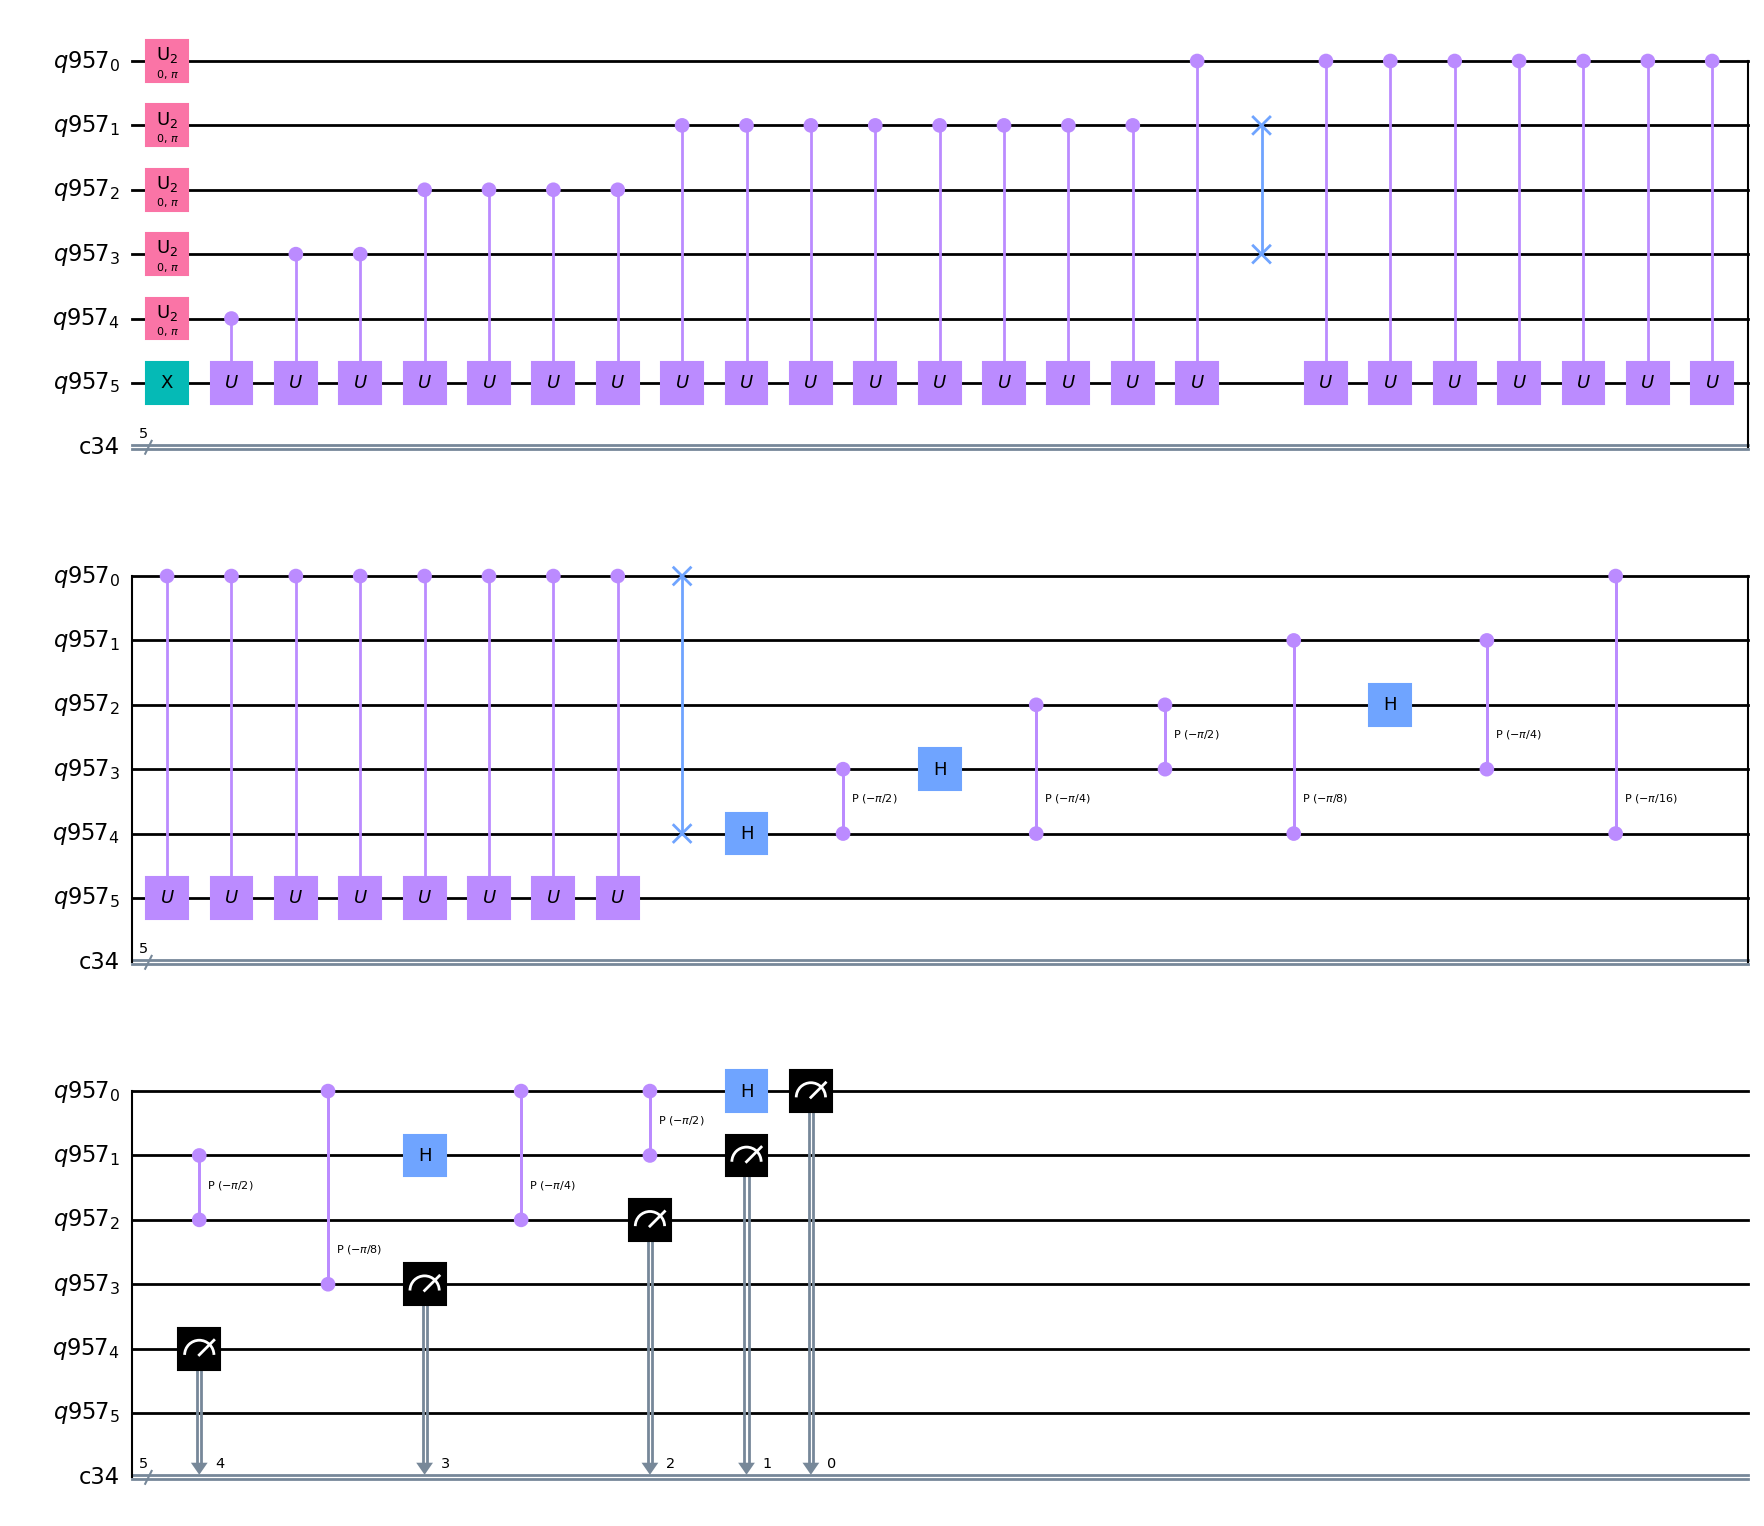

In [263]:
t = 5; n = 1
qr = QuantumRegister(t+n)
cr = ClassicalRegister(t)
qc = QuantumCircuit(qr, cr)
qc_qpe_ = qc_qpe(t,n)
qc.append(qc_qpe_, [j for j in range(0,t+n)])
qc.measure([j for j in range(0,t)],[j for j in range(0,t)])
qc.decompose().decompose().draw('mpl')

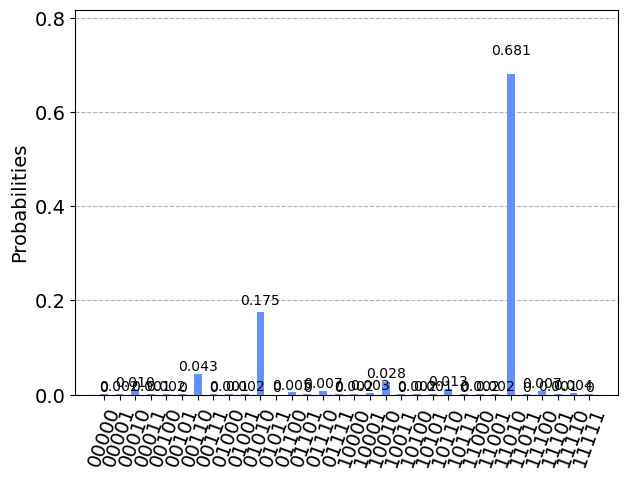

In [264]:
job_sim = execute(qc, backend = simulator, shots = nshots)
plot_histogram(job_sim.result().get_counts())

In [265]:
results = job_sim.result().get_counts()
results

{'10001': 27,
 '11010': 5580,
 '01010': 1437,
 '00010': 83,
 '00110': 353,
 '10100': 15,
 '10110': 104,
 '10010': 227,
 '11100': 61,
 '11000': 13,
 '01100': 40,
 '01110': 58,
 '10011': 6,
 '11101': 11,
 '10101': 11,
 '11011': 3,
 '00100': 14,
 '00011': 9,
 '00101': 7,
 '11001': 13,
 '01111': 5,
 '10000': 13,
 '01011': 2,
 '00000': 8,
 '11111': 5,
 '11110': 33,
 '00001': 16,
 '01000': 9,
 '10111': 7,
 '01001': 16,
 '00111': 3,
 '01101': 3}

In [266]:
list_keys = []; list_values = [] 
for key, val in results.items(): 
    list_keys.append(key)
    list_values.append(val)
print(list_keys)
print(list_values)

['10001', '11010', '01010', '00010', '00110', '10100', '10110', '10010', '11100', '11000', '01100', '01110', '10011', '11101', '10101', '11011', '00100', '00011', '00101', '11001', '01111', '10000', '01011', '00000', '11111', '11110', '00001', '01000', '10111', '01001', '00111', '01101']
[27, 5580, 1437, 83, 353, 15, 104, 227, 61, 13, 40, 58, 6, 11, 11, 3, 14, 9, 7, 13, 5, 13, 2, 8, 5, 33, 16, 9, 7, 16, 3, 3]


In [267]:
larger = 0
for j in range(0, 2**t):
    if list_values[j] > larger:
        larger = list_values[j]
        j_max = j
print(j_max, list_values[j_max], list_keys[j_max])

1 5580 11010


In [268]:
bl = [int(bit) for bit in list_keys[j_max]]
b = 0
for j in range(0,t):
    if bl[j] != 0:
        b = b + 2**j
print(b)

11


In [269]:
11/32

0.34375

Nesse caso, para $t=5$, obtemos
\begin{align}
\phi_u & \approx 2^{-5}(01011) = \frac{11}{32} \\
& \approx 0.34375,
\end{align}
que está bem mais próximo do resultado esperado $0.33333$.

### Ainda mais precisão
Para finalizar o exemplo, vamos usar ainda mais qubits no 1º registro para melhorar ainda mais a precisão
$$t= 10.$$

In [270]:
def fun_b(results, t):
    # funcao para calcular o inteiro base 10 correspondente ao bit string de maxima probabilidade
    list_keys = []; list_values = [] 
    for key, val in results.items(): 
        list_keys.append(key)
        list_values.append(val)
    larger = 0
    for j in range(0, len(results)):
        if list_values[j] > larger:
            larger = list_values[j]
            j_max = j
    bl = [int(bit) for bit in list_keys[j_max]]
    b = 0
    for j in range(0,t):
        if bl[j] != 0:
            b = b + 2**j
    return b

In [271]:
t = 10; n = 1
qr = QuantumRegister(t+n)
cr = ClassicalRegister(t)
qc = QuantumCircuit(qr, cr)
qc_qpe_ = qc_qpe(t,n)
qc.append(qc_qpe_, [j for j in range(0,t+n)])
qc.measure([j for j in range(0,t)],[j for j in range(0,t)])
qc.decompose().decompose().draw('mpl')

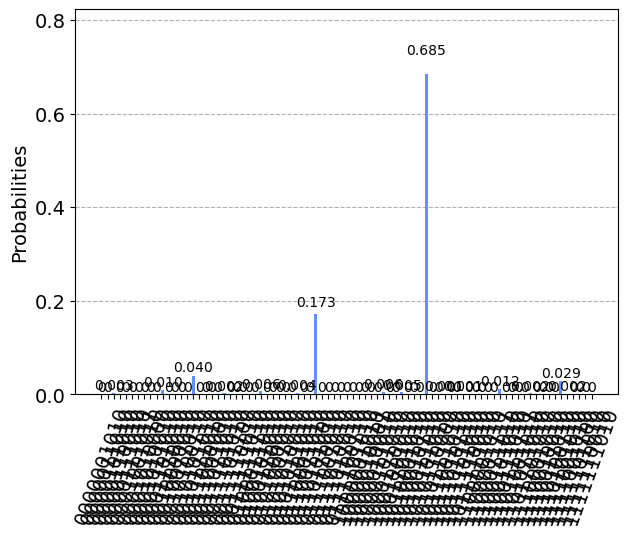

In [272]:
job_sim = execute(qc, backend = simulator, shots = nshots)
plot_histogram(job_sim.result().get_counts())

In [273]:
results = job_sim.result().get_counts()
b = fun_b(results,t)
print(b)

341


In [274]:
341/2**10

0.3330078125

Coforme o código acima, nesse caso a estimativa para a autofase é
$$\phi_u \approx \frac{341}{2^{10}} \approx 0.3330078125,$$
que já está bem próximo de $0.3333333333.$

## Exemplo: unitária de 2 qubits

Vamos considerar
$$U = C_z = \begin{bmatrix} 1&0&0&0 \\ 0&1&0&0 \\ 0&0&1&0 \\ 0&0&0&-1\end{bmatrix}.$$
Vamos considerar o autorvetor
$$|u\rangle = \begin{bmatrix}0\\0\\0\\1\end{bmatrix} = |11\rangle,$$
cujo autovalor correspondente é
$$u = -1 = e^{i\pi} = e^{2\pi i/2}.$$
Então nesse caso teremos que
$$\phi_u = \frac{1}{2}.$$

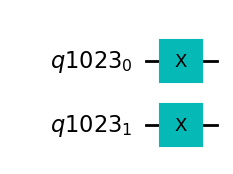

In [275]:
def qc_eigvec_prep(n):
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr, name=r'$|u\rangle$')
    qc.x([0,1]) # prepara |11>
    return qc
qc_eigvec_prep_ = qc_eigvec_prep(n=2)
qc_eigvec_prep_.draw('mpl')

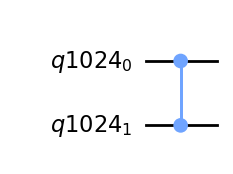

In [276]:
def qc_U(n):
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr, name=r'$U$')
    qc.cz(0,1)
    return qc
qc_U_ = qc_U(n=2)
qc_U_.draw('mpl')

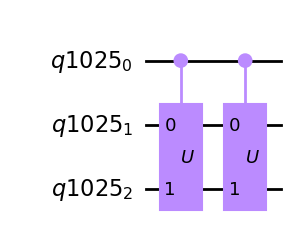

In [277]:
n = 2; N = 2
qc_ctrlu_  = qc_ctrlu(n,N)
qc_ctrlu_.draw('mpl')

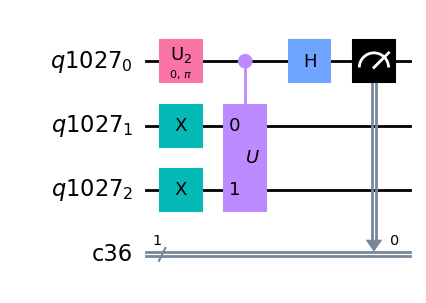

In [278]:
t = 1; n = 2
qr = QuantumRegister(t+n)
cr = ClassicalRegister(t)
qc = QuantumCircuit(qr, cr)
qc_qpe_ = qc_qpe(t,n)
qc.append(qc_qpe_, [j for j in range(0,t+n)])
qc.measure([j for j in range(0,t)],[j for j in range(0,t)])
qc.decompose().decompose().draw('mpl')

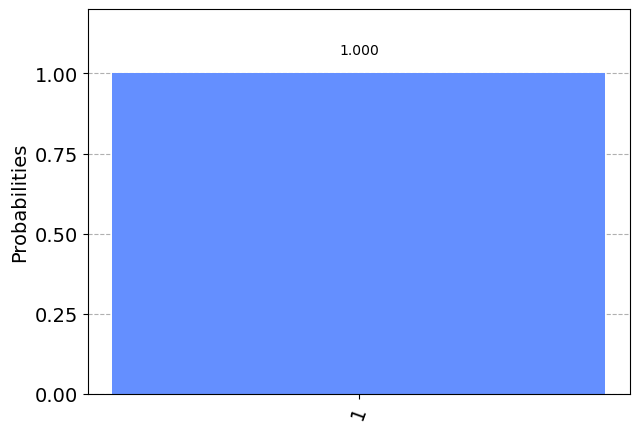

In [279]:
job_sim = execute(qc, backend = simulator, shots = nshots)
plot_histogram(job_sim.result().get_counts())

Temos assim a estimativa para a autofase
$$\phi_u \approx 2^{-1}(1) = 2^{-1}2^0 = \frac{1}{2}.$$

## Análise de performance e requerimentos

Vimos que depois da aplicação das portas unitárias controladas o estado dos $t$ qubits do 1º registro é dado por
$$|\psi_3\rangle = \frac{1}{2^{t/2}}\sum_{k=0}^{2^t -1}e^{2\pi i k\phi_u}|k\rangle.$$
Lembremos que a transformada de Fourier discreta quântica e sua inversa são
\begin{align}
& F = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{2\pi i kl 2^{-t}}|k\rangle\langle l|, \\
& F^\dagger = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|l\rangle\langle k| \equiv \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|k\rangle\langle l|.
\end{align}

Com isso, o estado final do protocolo de estimativa de fase será
\begin{align}
|\psi_4\rangle & = F^\dagger|\psi_3\rangle \\
& = \frac{1}{2^{t/2}}\sum_{k,l=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}|l\rangle\langle k|\frac{1}{2^{t/2}}\sum_{j=0}^{2^t -1}e^{2\pi i j\phi_u}|j\rangle \\
& = \frac{1}{2^t}\sum_{k,l,j=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}}e^{2\pi i j\phi_u}|l\rangle\langle k|j\rangle \\
& = \sum_{l=0}^{2^t - 1}\Big(\frac{1}{2^t}\sum_{k=0}^{2^t - 1}e^{-2\pi i kl 2^{-t}+2\pi i k\phi_u}\Big)|l\rangle \\
& = \sum_{l=0}^{2^t - 1}\Big(\frac{1}{2^t}\sum_{k=0}^{2^t - 1}\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^k\Big)|l\rangle \\
& =: \sum_{l=0}^{2^t - 1}\alpha_l|l\rangle,
\end{align}
em que definimos
$$\alpha_l = \frac{1}{2^t}\sum_{k=0}^{2^t - 1}\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^k.$$

---

### Série geométrica
$$S_n = \sum_{j=0}^{n-1}ar^j = \sum_{l=1}^{n}ar^{l-1} = \frac{a(1-r^n)}{1-r}.$$
Primeiramente vemos que a fórmula é valida para $n=1$:
$$S_1 = \sum_{j=0}^{1-1}ar^j = a$$
e 
$$\frac{a(1-r^1)}{1-r} = a.$$
Agora vamos fazer a __prova por indução__. Assumimos que a fórmula é válida para $n=k$, ou seja, assumimos que
$$S_k = \sum_{j=0}^{k-1}ar^j  = \frac{a(1-r^k)}{1-r}.$$

Vamos mostrar que isso implica que a fórmula também é válida para $n=k+1$:
\begin{align}
S_{k+1} & = \sum_{j=0}^{k+1-1}ar^j  \\
& = \sum_{j=0}^{k}ar^j \\
& = \sum_{j=0}^{k-1}ar^j + ar^{k} \\
& = S_k + ar^{k} \\
& = \frac{a(1-r^k)}{1-r} + ar^{k} \\
& = \frac{a\big(1-r^k +r^{k}(1-r)\big)}{1-r} \\
& = \frac{a\big(1-r^k + r^{k} - r^{k+1}\big)}{1-r} \\
& = \frac{a(1-r^{k+1})}{1-r}.
\end{align}
Concluímos assim, por indução, que se a fórmula vale para $n=k$ ela vale para $n=k+1$. Então, como a fórmula vale para $n=1$, ela valerá para todo $n>1$.

---

Usando a série geométrica, podemos escrever as __amplitudes de probabilidade__ no estado $|\psi_4\rangle$ como
\begin{align}
\alpha_l & = \frac{1}{2^t}\sum_{k=0}^{2^t - 1}\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^k \\
& = \frac{1}{2^t}\frac{1-\big(e^{2\pi i(\phi_u - l 2^{-t})}\big)^{2^t}}{1-e^{2\pi i(\phi_u - l 2^{-t})}} \\
& = \frac{1}{2^t}\frac{1-e^{2\pi i(2^t \phi_u - l)}}{1-e^{2\pi i(\phi_u - l 2^{-t})}}.
\end{align}

Consideremos 
$$b\in\mathbb{N},\ 0\le b\le 2^t - 1$$
de forma que
$$b \le 2^t\phi_u$$
é o número __inteiro mais próximo__ de $2^t \phi_u$. A diferença é dada então por
$$2^t \delta = 2^t\phi_u - b \ge 0\ \therefore\ \delta = \phi_u - 2^{-t}b,$$
de forma que
$$0\le 2^t\delta\le 1\ \therefore\ 0\le\delta\le 2^{-t}.$$

<img src='fig_qpe_b.png' width='300'>

Para 
$$\epsilon\in\mathbb{Z}_{>0}$$
sendo um número inteiro estabelecendo o __erro tolerado__, a probabilidade de medirmos um estado $|m\rangle$ tal que $|m-b|>\epsilon$ é
$$Pr(|m-b|>\epsilon) = \sum_{l=0}^{b-(\epsilon+1)}|\alpha_l|^2 + \sum_{l=b+(\epsilon+1)}^{2^t -1}|\alpha_l|^2.$$
Veja a figura abaixo.

<img src='fig_integer_line.png' width='600'>

---
Temos que
\begin{align}
|1-e^{i\theta}| & = |-e^{i\theta/2}(-e^{-i\theta/2}+e^{i\theta/2})| \\
& = |-e^{i\theta/2}||2i\sin(\theta/2)| \\
& = 2|\sin(\theta/2)| \\
& \le 2,
\end{align}
em que usamos $|\sin(\theta/2)|\le 1$.

---

Usando essa desigualdade, obtemos
\begin{align}
|\alpha_l| & = \Big|\frac{1}{2^t}\frac{1-e^{2\pi i(2^t \phi_u - l)}}{1-e^{2\pi i(\phi_u - l 2^{-t})}}\Big| \\
& = \frac{1}{2^t}\frac{\Big|1-e^{2\pi i(2^t \phi_u - l)}\Big|}{\Big|1-e^{2\pi i(\phi_u - l 2^{-t})}\Big|} \\
& \le \frac{1}{2^t}\frac{2}{\Big|1-e^{2\pi i(\phi_u - l 2^{-t})}\Big|}.
\end{align}

---
Também é valida a desigualdade
$$|1-e^{i\theta}|\ge \frac{2|\theta|}{\pi}\ \text{para}\ -\pi\le\theta\le\pi.$$
Esta relação está verificada graficamente abaixo.

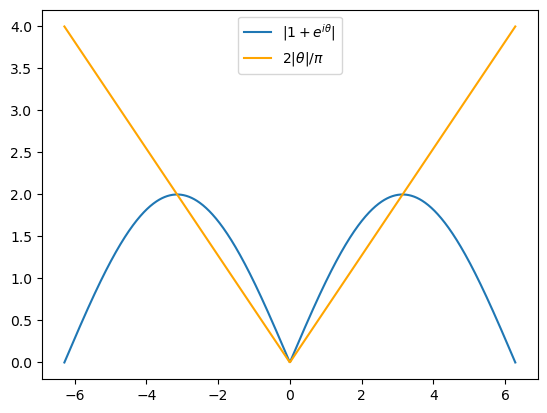

In [7]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y1 = np.abs(1-np.cos(x)+1j*np.sin(x))
y2 = (2*np.abs(x))/math.pi  
plt.plot(x, y1, label=r'$|1+e^{i\theta}|$')
plt.plot(x, y2, label=r'$2|\theta|/\pi$', color='orange') 
plt.legend() 
plt.show() 

---


Na equação acima teríamos
\begin{align}
\theta = 2\pi(\phi_u - 2^{-t}l) = \pi \frac{2^t \phi_u - l}{2^{t-1}}.
\end{align}
Esse $\theta$ está em $[-\pi,\pi]$?

Usando a desigualdade $|1-e^{i\theta}|\ge 2|\theta|/\pi$ para $-\pi\le\theta\le\pi$, teremos que
\begin{align}
|\alpha_l| & \le \frac{1}{2^{t-1}}\frac{1}{\Big|1-e^{i 2\pi (\phi_u - l 2^{-t})}\Big|} \\
& \le \frac{1}{2^{t-1}}\frac{1}{2|2\pi (\phi_u - l 2^{-t})|/\pi} \\
& = \frac{1}{2^{t+1}|\phi_u - l 2^{-t}|} \\
& = \frac{1}{2|2^t \phi_u - l|}.
\end{align}

Vem assim que
\begin{align}
Pr(|m-b|>\epsilon) & = \sum_{l=0}^{b-(\epsilon+1)}|\alpha_l|^2 + \sum_{l=b+(\epsilon+1)}^{2^t -1}|\alpha_l|^2 \\
& \le \sum_{l=0}^{b-(\epsilon+1)}\frac{1}{2^2|2^t \phi_u - l|^2} + \sum_{l=b+(\epsilon+1)}^{2^t -1}\frac{1}{2^2 |2^t \phi_u - l|^2} \\
& = \frac{1}{4}\sum_{l=0}^{b-\epsilon-1}\frac{1}{|2^t \phi_u - l|^2} + \frac{1}{4}\sum_{l=b+(\epsilon+1)}^{2^t -1}\frac{1}{|l-2^t \phi_u|^2} \\
& \vdots \\
& \le \frac{1}{2(\epsilon-1)}.
\end{align}

Segundo Nielsen e Chuang, para obter $\phi_u$ com $p$ bits de precisão e com probabilidade de sucesso não menor que $p_s =1-\epsilon$ devemos utilizar o seguinte número de qubits no 1º registro:
$$t = p + \log_2\Big(2+\frac{1}{2\epsilon}\Big).$$

Por exemplo, se queremos
$$p=5$$
bits de precisão e queremos que a probabilidade de seucesso seja
$$p_s=0.5\ \therefore\ \epsilon = 0.5,$$
então
$$t = 7.$$
Para 
$$p_s=0.94\ \therefore\ \epsilon=2^{-4}$$
temos
$$t = 9.$$

In [15]:
from sympy import *
import math

In [19]:
math.log2(3), math.log2(10), 15/16

(1.584962500721156, 3.321928094887362, 0.9375)

---

### Referências

1. Nielsen M A and Chuang I L 2000 Quantum Computation and Quantum Information (Cambridge: Cambridge University Press).

1. https://learn.qiskit.org/course/ch-algorithms/quantum-phase-estimation